## reading mpu6050

In [14]:
%reset -f
import numpy as np
import serial
import time

global pi
pi = np.pi

In [15]:
import serial.tools.list_ports as port_list
ports = list(port_list.comports())
for p in ports:
	print(p)

COM6 - Standardmäßgige Seriell-über-Bluetooth-Verbindung (COM6)
COM3 - Standardmäßgige Seriell-über-Bluetooth-Verbindung (COM3)
COM5 - Standardmäßgige Seriell-über-Bluetooth-Verbindung (COM5)
COM4 - Standardmäßgige Seriell-über-Bluetooth-Verbindung (COM4)


In [27]:
#read raw data
s = serial.Serial(port='COM8', baudrate=115200, bytesize=serial.EIGHTBITS, timeout=2)
for i in range(10):
    data = s.readline()
    print( data )
s.close

b'start up\r\n'
b'setup complete\r\n'
b'12032 -0.05676 0.03510 -0.08942 0.06958 -0.03687 0.91479\r\n'
b'12 -0.05676 0.00458 -0.05890 0.07324 -0.03467 0.91626\r\n'
b'12 -0.02625 0.03510 -0.02838 0.07324 -0.03540 0.91431\r\n'
b'13 -0.05676 0.03510 0.03265 0.07153 -0.03540 0.91626\r\n'
b'20 -0.05676 0.00458 0.06317 0.07227 -0.03491 0.91577\r\n'
b'20 -0.08728 -0.05646 0.03265 0.07495 -0.03760 0.91504\r\n'
b'20 -0.08728 0.03510 0.03265 0.07227 -0.03467 0.91602\r\n'
b'20 -0.05676 0.03510 0.00214 0.07275 -0.03589 0.91943\r\n'


<bound method Serial.close of Serial<id=0x216fe449130, open=True>(port='COM8', baudrate=115200, bytesize=8, parity='N', stopbits=1, timeout=2, xonxoff=False, rtscts=False, dsrdtr=False)>

## rotation matricies

\begin{align}
X_\theta & =
\begin{bmatrix}
 1 & 0 & 0 \vphantom{\dfrac12}\\
 0 & \cos\theta_1 & \sin\theta_1\vphantom{\dfrac12}\\
 0 & -\sin\theta_1 & \cos\theta_1\vphantom{\dfrac12}
 \end{bmatrix} \\
Y_\theta & =
\begin{bmatrix}
 \cos\theta_2 & 0 & -\sin\theta_2\vphantom{\dfrac12}\\
 0 & 1 & 0 \vphantom{\dfrac12}\\
 \sin\theta_2 & 0 & \cos\theta_2\vphantom{\dfrac12}
 \end{bmatrix} \\
Z_\theta & =
\begin{bmatrix}
 \cos\theta_3 & \sin\theta_3 & 0 \vphantom{\dfrac12}\\
 -\sin\theta_3 & \cos\theta_3 & 0 \vphantom{\dfrac12}\\
 0 & 0 & 1 \vphantom{\dfrac12}\\
 \end{bmatrix}
\end{align}



## rotation around vector $\vec{n}$

\begin{align}
R(\vec{n}, \theta) \cdot \vec{r} &= \vec{n}(\vec{n} \cdot \vec{r}) + \cos(\theta)(\vec{n} \times \vec{r}) \times \vec{n} + \sin(\theta) (\vec{n} \times \vec{r})\\
& =\begin{bmatrix}
 \cos\theta+(1-\cos\theta)n_1^2&(1-\cos\theta)n_1n_2+\sin\theta n_3&(1-\cos\theta)n_1n_3-\sin\theta n_2 \vphantom{\dfrac12}\\
 (1-\cos\theta)n_2n_1-\sin\theta n_3&\cos\theta+(1-\cos\theta)n_2^2&(1-\cos\theta)n_2n_3+\sin\theta n_1\vphantom{\dfrac12}\\
 (1-\cos\theta)n_3n_1+\sin\theta n_2&(1-\cos\theta)n_3n_2-\sin\theta n_1&\cos\theta+(1-\cos\theta)n_3^2\vphantom{\dfrac12}
 \end{bmatrix} \cdot \vec{v}
\end{align}


## euler angle rotation

The rotation of e.g. a vector can be described by rotating it 3 times with the rotation matricies along some axis.
The rotation can be described either extrinsic as seen from the outside along a a fixed coordinate system x,y,z or intrinsic by rotating the (mobile) coordinate system 

For example the extrinsic (fixed-axis) rotation XYZ also called RPY (Roll-Pitch-Yaw) can be written with rotation matricies as:
\begin{align}
\vec{r}' = Z_\theta Y_\theta X_\theta \vec{r}
\end{align}
where the rotation matricies get applied to vector $\vec{r}$ in order X then Y then Z.

The same (equal!)rotation written as an intrinsic (mobile-axis) rotation Z'Y'X' is:
\begin{align}
\vec{r}' &= X'_\theta Y'_\theta Z'_\theta \vec{r}
\end{align}

Here is the proof that XYZ and Z'Y'X' are equivalent rotations

\begin{align}
Z Y X &= \big[ Y X Z Y^{-1} X^{-1} \big] \big[ X Y X^{-1} \big] \big[ X \big] \\
      &= Z' Y' X'
\end{align}

the possible extrinsic rotations are: XYX, XYZ, XZX, XZY, YXY, YXZ, YZX, YZY, ZXY, ZXZ, ZYX, ZYZ<br>
there are the same number of intrinsic rotations: X'Y'X', X'Y'Z', X'Z'X', X'Z'Y', Y'X'Y', Y'X'Z', Y'Z'X', Y'Z'Y', Z'X'Y', Z'X'Z', Z'Y'X', Z'Y'Z'<br>
and a lot of mixed rotations (wich nobody uses).


## quaternion

4D numbers, wich can be written with a scalar part $a$ and a vector part $\vec{v}$:

\begin{align}
q &= a + ib + jc + kd \\
&= (a,\vec{v}) \\
\end{align}

##### Addition
\begin{align}
q_1 + q_2 &= (a_1 + a_2,\vec{v}_1 + \vec{v}_2) \\
\end{align}

##### Multiplication
\begin{align}
q_1 \cdot q_2 &= (a_1 \cdot a_2 - \vec{v}_1 \cdot \vec{v}_2,a_1 \vec{v}_2 + a_2 \vec{v}_1 + \vec{v}_1 \times \vec{v}_2) \\
\end{align}
by multiplying the terms with each other using the identities: $i^2 = j^2 = k^2 = -1$, $ij = k = -ji$, $jk = i = -kj$ and $ki = j = -ik$ and rewritting them into scalars $a_1,a_2$ end vectors $(b_1,c_1,d_1),(b_2,c_2,d_2)$.

##### Conjugate
\begin{align}
q^* &= (a, -\vec{v}) \\
\end{align}

##### Length
\begin{align}
|| q || &= q \cdot q^* \\
&= (a^2 + \vec{v}^2, 0)\\
&= a^2 + \vec{v}^2
\end{align}

##### Inverse
\begin{align}
q \cdot q^{-1} &\stackrel{!}{=} 1 \\
&= \frac{|| q ||}{|| q ||} \\
&= \frac{q \cdot q^*}{a^2 + \vec{v}^2} \\
&= q \cdot \frac{q^*}{a^2 + \vec{v}^2} \\
\Rightarrow q^{-1} &= \frac{q^*}{a^2 + \vec{v}^2} = \bigg( \frac{a}{a^2 + \vec{v}^2},\frac{-\vec{v}}{a^2 + \vec{v}^2} \bigg)
\end{align}

for unit quaternion
\begin{align}
|| q || &= 1 \\
q^{-1} &= q^* = (a,-\vec{v}) \\
\end{align}

##### exponential

using taylor expansion and $\vec{v} = bi+cj+dk$, $(\vec{v})^2=-b^2-c^2-d^2=-|\vec{v}|^2$, $(\vec{v})^n=(-1)^m(\vec{v})^{n-2m}$
\begin{align}
e^{q} &= e^{a+bi+cj+dk} \\
&= e^a e^{bi+cj+dk} \\
&= e^a e^{\vec{v}} \\
&= e^a \sum_{n=0}^\infty \frac{|\vec{v}|^n}{n!} \\
&= e^a \Big( \sum_{n=0}^\infty \frac{|\vec{v}|^{2n}}{(2n)!} + \sum_{n=0}^\infty (-1)^{n}\frac{\vec{v}}{|\vec{v}|}\frac{|\vec{v}|^{2n+1}}{(2n+1)!} \Big) \\
&= e^a \Big( \cos\big|\vec{v}\big| + \frac{\vec{v}}{|\vec{v}|}\sin\big|\vec{v}\big| \Big) \\
\end{align}
or with the first elements of the series written out (with $\theta = |\vec{v}|$):
\begin{align}
\begin{split}
e^\mathbf{v}&=\sum_{k=0}^\infty\dfrac{\mathbf{v}^k}{k!}=\\
&=1+\dfrac{\mathbf{v}}{1!}-\dfrac{\theta^2}{2!}-\dfrac{\theta^2\mathbf{v}}{3!}+\dfrac{\theta^4}{4!}+\dfrac{\theta^4\mathbf{v}}{5!}-\dfrac{\theta^6}{6!}+\cdots=\\
&=1+\dfrac{\theta\mathbf{v}}{1!\,\theta}-\dfrac{\theta^2}{2!}-\dfrac{\theta^3\mathbf{v}}{3!\,\theta}+\dfrac{\theta^4}{4!}+\dfrac{\theta^5\mathbf{v}}{5!\,\theta}-\dfrac{\theta^6}{6!}+\cdots=\\
&=\left(1-\dfrac{\theta^2}{2!}+\dfrac{\theta^4}{4!}-\dfrac{\theta^6}{6!}\cdots\right)+\dfrac{\mathbf{v}}{\theta}\left( \dfrac{\theta}{1!}-\dfrac{\theta^3}{3!}+\dfrac{\theta^5}{5!}\cdots\right)=\\
&=\cos\theta +\dfrac{\mathbf{v}}{\theta}\sin\theta
\end{split}
\end{align}

### quaternion rotation

similiar to rotation in the complex plane by multiplying complex number with $e^{i\theta}$.

rotate a vector written with quaternions $r = ix + jy + kz$ by a quaternion $q = a + ib + jc + kd = e^{\frac{\theta}{2}(ib + jc + kd)} = \cos(\theta) + \sin(\theta) \big(ib + jc + kd \big)$ with
\begin{align}
R_q r = q r q^{-1}
\end{align}

where $q^{-1} = q^* = a - ib - jc - kd$ (for a unit vector).
This can be proven by multiplying the components of $q^{-1},q,v$ out and rearranging, such that the result is the rotation around a vector $R(\vec{n}, \theta) \cdot \vec{r} = \vec{n}(\vec{n} \cdot \vec{r}) + \cos(\theta)(\vec{n} \times \vec{r}) \times \vec{n} + \sin(\theta) (\vec{n} \times \vec{r})$.

To rotate this vector by two quaternions $q$, $q'$ we can multiply the quaternions together:
\begin{align}
R_{q'}(R_q r) = q' q \,r\, q^{-1} q'^{-1} = q' q \,r\, (q' q)^{-1}  = R_{q'q} r
\end{align}


## quaternion time derivative
the gyro returns not a procedual rotation along the three axis in a specific order but a simultaneous rotation along all axis. Since rotation with euler angles is executed one axis after another the best to deal with gyro rotation is to convert it directly to quaternions.

first define rotation velocity:
\begin{align}
v &= \frac{d}{dt} r \\
v &= \vec{\omega} \times \vec{r}
\end{align}

calculating the derivative
\begin{align}
\frac{d}{dt} r &= \frac{dr}{dt} \big( q r_0 q^{-1} \big) \\
&= \dot{q} r_0 q^{-1} + q r_0 \dot{q}^{-1}
\end{align}

for unit vectors, as used for rotation the following holds true:
\begin{align}
0 &= \frac{d}{dt} 1 \\
&= \frac{d}{dt} \big( q q^* \big) \\
&= \frac{d}{dt} \big( q q^{-1} \big) \\
&= \dot{q} q^{-1} + q \dot{q}^{-1}  \\
\Rightarrow \dot{q} &= q \dot{q}^{-1} q \\
\Rightarrow \dot{q}^{-1} &= - q^{-1} \dot{q} q^{-1}
\end{align}

from wich follows:
\begin{align}
\frac{d}{dt} r &= \dot{q} r_0 q^{-1} - q r_0 q^{-1} \dot{q} q^{-1}
\end{align}

transforming this with $r_0 = q^{-1} r q$ results in:
\begin{align}
\frac{d}{dt} r &= \dot{q} q^{-1} r - r \dot{q} q^{-1} \\
&= \big[\dot{q} q^{-1}, r \big]
\end{align}

since $r$ (by definition) and $p = \dot{q} q^{-1}$ ($Scalar(\dot{q} q^{-1})=\sum_i \dot{q}_i q_i = \dot{\vec{q}} \vec{q} = |\dot{\vec{q}}| |\vec{q} $)| \cos(90^\circ) = 0) are vector quaternion without a scalar part the commutator relation with any quaternion should result in the following:
\begin{align}
\big[ p, r \big] &= p r - r p \\
&= (a_1 \cdot a_2 - \vec{v}_1 \cdot \vec{v}_2,a_1 \vec{v}_2 + a_2 \vec{v}_1 + \vec{v}_1 \times \vec{v}_2) - (a_2 \cdot a_1 - \vec{v}_2 \cdot \vec{v}_1,a_2 \vec{v}_1 + a_2 \vec{v}_1 + \vec{v}_2 \times \vec{v}_1) \\
&= (- \vec{v}_1 \cdot \vec{v}_2, \vec{v}_1 \times \vec{v}_2) - (- \vec{v}_2 \cdot \vec{v}_1,\vec{v}_2 \times \vec{v}_1) \\
&= 2(0,\vec{v}_1 \times \vec{v}_2) \\
&= 2 p r
\end{align}

with this in mind we get:
\begin{align}
\frac{d}{dt} r &= \big[\dot{q} q^{-1}, r \big] \\
&= 2 \dot{q} q^{-1} r
\end{align}

so our differential equation becomes
\begin{align}
2 \dot{q} q^{-1} r &= \omega r \\
\Leftrightarrow \dot{q} &= \frac{1}{2} \omega q
\end{align}

here $\omega$ is extrinsic. we transform it to the intrinsic rotation $\omega = q \omega' q^{-1}$ as measured by the gyro:
\begin{align}
\dot{q} &= \frac{1}{2} q \omega'
\end{align}

inserting $q = a + ib + jc + kd$ and $\omega = i\omega_x + j\omega_y + k\omega_z$ and multiplying out gives us:
\begin{align}
\dot{a} + i\dot{b} + j\dot{c} + k\dot{d} &= \frac{1}{2} ... \\
\underbrace{\begin{pmatrix} \dot{a} \\ \dot{b} \\ \dot{c} \\ \dot{d} \end{pmatrix}}_{\dot{q}(t)} \cdot \begin{pmatrix} 1 \\ i \\ j \\ k \end{pmatrix}  &= \frac{1}{2} \underbrace{\begin{pmatrix}0 & - \omega_x & - \omega_y & - \omega_z \\ \omega_x & 0 & \omega_z & - \omega_y \\ \omega_y & - \omega_z & 0 & \omega_x \\ \omega_z & \omega_y & - \omega_x & 0 \end{pmatrix}}_{A} \cdot \underbrace{\begin{pmatrix} a \\ b \\ c \\ d \end{pmatrix}}_{q(t)} \cdot \begin{pmatrix} 1 \\ i \\ j \\ k \end{pmatrix} 
\end{align}

This differential equation is equal to $\dot{q(t)} = 1/2 A q(t)$ with the solution:
\begin{align}
q(t) &= q_0 e^{A/2 (t-t_0)} \\
... \\
&= q_0 e^{\omega/2 (t-t_0)} \\
\end{align}


### quaternion integration for gyro
we use
\begin{align}
\dot{q} = \frac{1}{2} q \omega' \\
\approx \frac{q_{t+1}-q_{t}}{\Delta t}
\end{align}

from wich follows
\begin{align}
q_{t+1} \approx q_{t} + \frac{1}{2} q_{t} \omega' \Delta t
\end{align}

### euler angles -> quaternions

ZYX extrinsic euler notation

1. yaw around z-axis: $q_{x,\alpha} = \cos\frac\alpha2 + \left(\sin\frac\alpha2\right)\mathrm i$
2. pitch around y-axis: $q_{y,\beta} = \cos\frac\beta2 + \left(\sin\frac\beta2\right)\mathrm j$
3. roll around x-axis: $q_{z,\gamma} = \cos\frac\gamma2 + \left(\sin\frac\gamma2\right)\mathrm k$

with $i^2 = j^2 = k^2 = -1$, $ij = k = -ji$, $jk = i = -kj$ and $ki = j = -ik$ this results in:

\begin{align}
q_{z,\gamma}q_{y,\beta}q_{x,\alpha}
 &= \left(\cos\frac\gamma2 + \left(\sin\frac\gamma2\right)\mathrm k\right)
   \left(\cos\frac\beta2 + \left(\sin\frac\beta2\right)\mathrm j\right)
   \left(\cos\frac\alpha2 + \left(\sin\frac\alpha2\right)\mathrm i\right) \\
&= \left(\cos\frac\gamma2+ \left(\sin\frac\gamma2\right)\mathrm k\right) \\
& \qquad \left(\cos\frac\alpha2\cos\frac\beta2
   + \left(\sin\frac\alpha2\cos\frac\beta2\right)\mathrm i
 + \left(\cos\frac\alpha2\sin\frac\beta2\right)\mathrm j
   - \left(\sin\frac\alpha2\sin\frac\beta2\right)\mathrm k\right) \\
&= \cos\frac\alpha2\cos\frac\beta2\cos\frac\gamma2
  + \sin\frac\alpha2\sin\frac\beta2\sin\frac\gamma2 \\
& \qquad + \left(\sin\frac\alpha2\cos\frac\beta2\cos\frac\gamma2
              - \cos\frac\alpha2\sin\frac\beta2\sin\frac\gamma2\right)\mathrm i\\
& \qquad + \left(\cos\frac\alpha2\sin\frac\beta2\cos\frac\gamma2
              + \sin\frac\alpha2\cos\frac\beta2\sin\frac\gamma2\right)\mathrm j\\
& \qquad + \left(\cos\frac\alpha2\cos\frac\beta2\sin\frac\gamma2
              - \sin\frac\alpha2\sin\frac\beta2\cos\frac\gamma2\right)\mathrm k.
\end{align}

In [58]:
import numpy as np

def quaternion_multiply(q0, q1):
    return np.array([-q1[1] * q0[1] - q1[2] * q0[2] - q1[3] * q0[3] + q1[0] * q0[0],
                     q1[1] * q0[0] + q1[2] * q0[3] - q1[3] * q0[2] + q1[0] * q0[1],
                     -q1[1] * q0[3] + q1[2] * q0[0] + q1[3] * q0[1] + q1[0] * q0[2],
                     q1[1] * q0[2] - q1[2] * q0[1] + q1[3] * q0[0] + q1[0] * q0[3]])

def quaternion_inverse(q):
    return np.array([q[0],-q[1],-q[2],-q[3]])

def quaternion_length(q):
    return np.sqrt(q[0]**2+q[1]**2+q[2]**2+q[3]**2)

def quaternion_rotate(q, q_rot):
    return quaternion_multiply( quaternion_multiply(q_rot,q) , quaternion_inverse(q_rot) )

def vector_rotate(vec, q):
    qv = np.array([0,vec[0],vec[1],vec[2]])
    qv = quaternion_rotate(qv,q)
    return qv[1:4]

#rotation in ZYX extrinsic (fixed-axis) order = XYZ intrinsic
def euler_to_quaternion(a,b,c):
    ca = np.cos(a/2); sa = np.sin(a/2);
    cb = np.cos(b/2); sb = np.sin(b/2);
    cc = np.cos(c/2); sc = np.sin(c/2);
    return np.array([ca*cb*cc+sa*sb*sc,sa*cb*cc-ca*sb*sc,ca*sb*cc+sa*cb*sc,ca*cb*sc-sa*sb*cc])

q0 = np.random.rand(4)
q0 /= quaternion_length(q0)
q1 = np.random.rand(4)
q1 /= quaternion_length(q1)
q0 , quaternion_length(q0) , quaternion_inverse(q0) , quaternion_multiply(q0, q1) , quaternion_rotate(q0, q1) , euler_to_quaternion(1,1,1)

(array([0.40217874, 0.44534897, 0.64701301, 0.47041547]),
 0.9999999999999999,
 array([ 0.40217874, -0.44534897, -0.64701301, -0.47041547]),
 array([-0.41318626,  0.33816697,  0.53695814,  0.6531433 ]),
 array([0.40217874, 0.75873646, 0.37556372, 0.34860169]),
 array([0.78606663, 0.16751879, 0.57094147, 0.16751879]))

In [33]:
vec = np.array([1,1,1])
print( 'rotate [1,1,1] around x-axis: ' , vector_rotate(vec,euler_to_quaternion(-pi/2,0,0)) )
print( 'rotate [1,1,1] around y-axis: ' , vector_rotate(vec,euler_to_quaternion(0,-pi/2,0)) )
print( 'rotate [1,1,1] around z-axis: ' , vector_rotate(vec,euler_to_quaternion(0,0,-pi/2)) )

rotate [1,1,1] around x-axis:  [ 1. -1.  1.]
rotate [1,1,1] around y-axis:  [ 1.  1. -1.]
rotate [1,1,1] around z-axis:  [-1.  1.  1.]


### MPU6050

<img src="mpu6050.jpg" style="width:200px">


In [56]:
import serial
import time

N = 100
g = 9.81

orientation = np.zeros((4,N)) #quaternions
position = np.zeros((3,N)) #global coordinates
velocity = np.zeros((3,N)) #global coordinates
acceleration = np.zeros((3,N)) #global coordinates
i = 0

#open serial port
s = serial.Serial(port='COM8', baudrate=115200, bytesize=serial.EIGHTBITS, timeout=2)
while i<N:
    data = s.readline()
    #print( data )
    try:
        data = data.decode().split(" ")
    except:
        pass
    if len(data)==7:
        reading = [float(e) for e in data]
        #print(reading)
        
        dt = reading[0]
        gyro = np.array(reading[0:4])
        gyro[0] = 0
        accel = np.array(reading[4:7])
        
        if i==0:
            q0 = np.array([1,0,0,0])
            w0 = np.array([1,0,0,0])
            orientation[:,0] = q0 + 1/2*quaternion_multiply(q0,w0)
            acceleration[:,0] = accel
            velocity[:,0] = np.zeros(3)
            position[:,0] = np.zeros(3)
        else:
            orientation[:,i] = q0 + 1/2*quaternion_multiply(orientation[:,i-1],gyro)*dt
            x,y,z = np.array([1,0,0]),np.array([0,1,0]),np.array([0,0,1])
            x,y,z = vector_rotate(x,orientation[:,i]), vector_rotate(y,orientation[:,i]), vector_rotate(z,orientation[:,i])
            dirMat = np.zeros((3,3))
            dirMat[:,0],dirMat[:,1],dirMat[:,2] = x,y,z
            acceleration[:,i] = accel
            velocity[:,i] = velocity[:,i-1] + np.matmul(dirMat,acceleration[:,i])*g*dt
            position[:,i] = position[:,i-1] + np.matmul(dirMat,velocity[:,i])*dt + np.matmul(dirMat,acceleration[:,i])*g/2*dt**2
        
        i += 1
s.close

<bound method Serial.close of Serial<id=0x216fe4f3910, open=True>(port='COM8', baudrate=115200, bytesize=8, parity='N', stopbits=1, timeout=2, xonxoff=False, rtscts=False, dsrdtr=False)>

<IPython.core.display.Javascript object>


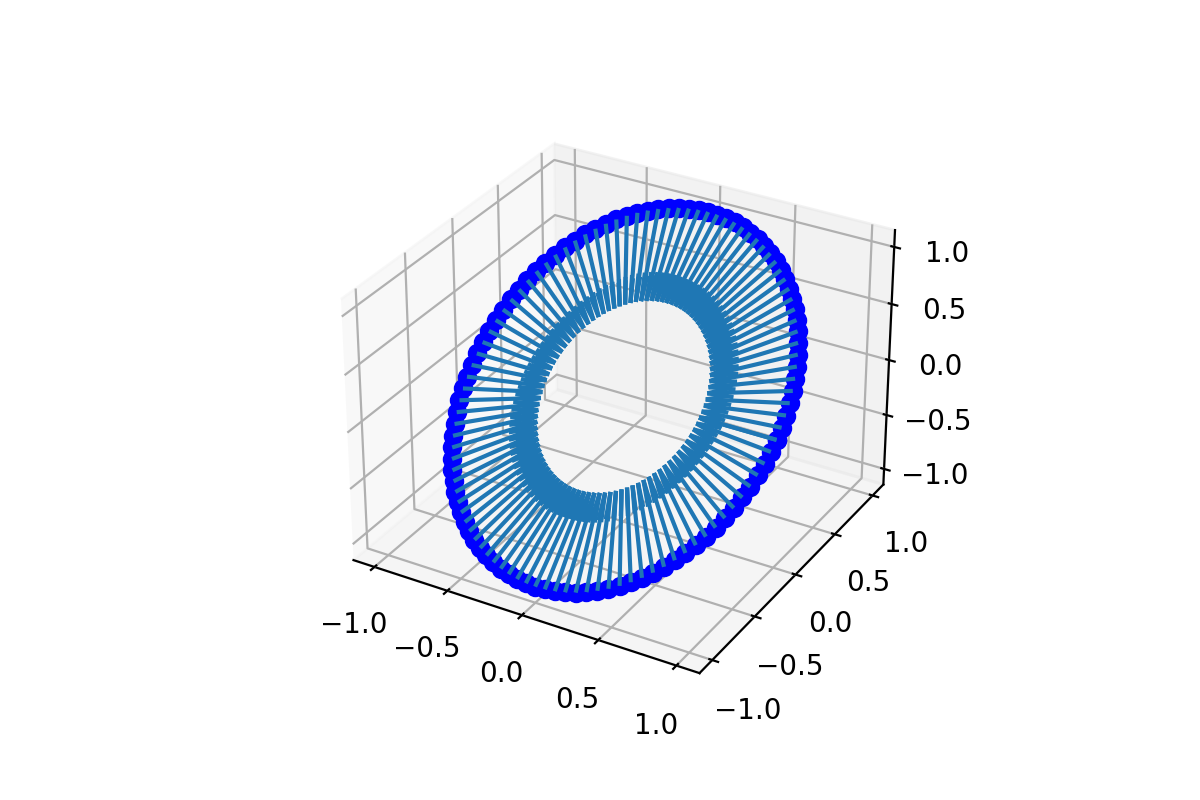

In [12]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

#data
N = 100
t = 0
dt = 2*np.pi/N
x = [np.cos(t)]
y = [np.sin(t)]
u = [-0.5*np.cos(t)]
v = [-0.5*np.sin(t)]

#plot
plt.ion()

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111,projection="3d")
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)
ax.set_zlim(-1.1,1.1)
im, = ax.plot(x,y,y,color='b',marker='o',ls='')
Quiv = ax.quiver(x,y,y,u,v,v)
fig.canvas.draw()

for update in range(N):
    
    #add data
    t += dt
    x.append(np.cos(t))
    y.append(np.sin(t))
    u.append(-0.5*np.cos(t))
    v.append(-0.5*np.sin(t))
    
    #update plot
    im.remove()
    im, = ax.plot(x,y,y,color='b',marker='o',ls='')
    
    Quiv.remove()
    Quiv = ax.quiver(x,y,y,u,v,v)
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    plt.pause(0.02)


<IPython.core.display.Javascript object>


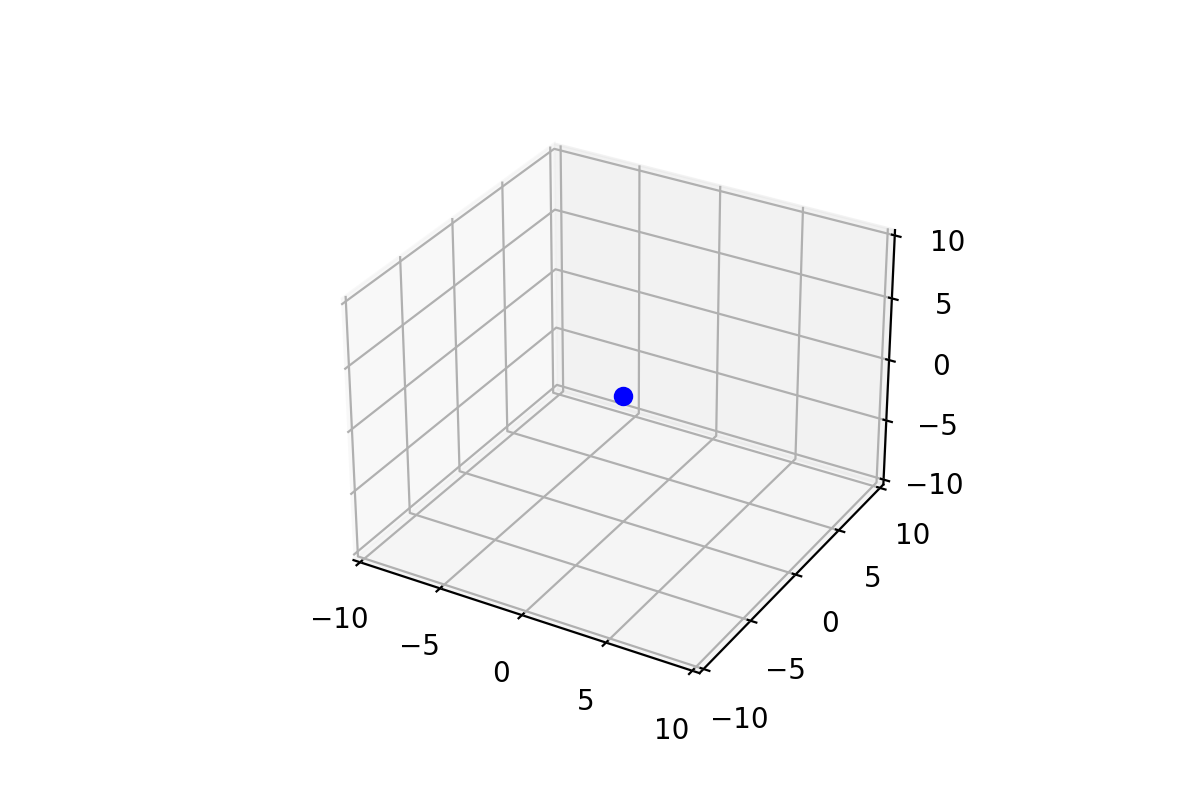

<bound method Serial.close of Serial<id=0x216fe47ef40, open=True>(port='COM8', baudrate=115200, bytesize=8, parity='N', stopbits=1, timeout=2, xonxoff=False, rtscts=False, dsrdtr=False)>

In [63]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt


#data
import serial
import time

N = 100
g = 9.81

orientation = np.zeros((4,N)) #quaternions
position = np.zeros((3,N)) #global coordinates
velocity = np.zeros((3,N)) #global coordinates
acceleration = np.zeros((3,N)) #global coordinates
i = 0

#open serial port
s = serial.Serial(port='COM8', baudrate=115200, bytesize=serial.EIGHTBITS, timeout=2)
while i<1:
    data = s.readline()
    #print( data )
    try:
        data = data.decode().split(" ")
    except:
        pass
    if len(data)==7:
        reading = [float(e) for e in data]
        #print(reading)
        
        dt = reading[0]
        gyro = np.array(reading[0:4])
        gyro[0] = 0
        accel = np.array(reading[4:7])
        
        q0 = np.array([1,0,0,0])
        w0 = np.array([1,0,0,0])
        orientation[:,0] = q0 + 1/2*quaternion_multiply(q0,w0)
        acceleration[:,0] = accel
        velocity[:,0] = np.zeros(3)
        position[:,0] = np.zeros(3)
        
        i += 1

#plot
plt.ion()

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111,projection="3d")
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(-10,10)
im, = ax.plot(0,0,0,color='b',marker='o',ls='')
#Quiv = ax.quiver(x,y,y,u,v,v)
fig.canvas.draw()

while i<N:
    data = s.readline()
    #print( data )
    try:
        data = data.decode().split(" ")
    except:
        pass
    if len(data)==7:
        reading = [float(e) for e in data]
        #print(reading)
        
        dt = reading[0]
        gyro = np.array(reading[0:4])
        gyro[0] = 0
        accel = np.array(reading[4:7])
        
        orientation[:,i] = q0 + 1/2*quaternion_multiply(orientation[:,i-1],gyro)*dt
        x,y,z = np.array([1,0,0]),np.array([0,1,0]),np.array([0,0,1])
        x,y,z = vector_rotate(x,orientation[:,i]), vector_rotate(y,orientation[:,i]), vector_rotate(z,orientation[:,i])
        dirMat = np.zeros((3,3))
        dirMat[:,0],dirMat[:,1],dirMat[:,2] = x,y,z
        acceleration[:,i] = accel
        velocity[:,i] = velocity[:,i-1] + np.matmul(dirMat,acceleration[:,i])*g*dt
        position[:,i] = position[:,i-1] + np.matmul(dirMat,velocity[:,i])*dt + np.matmul(dirMat,acceleration[:,i])*g/2*dt**2
        
        #update plot
        im.remove()
        im, = ax.plot(position[0,0:i+1],position[1,0:i+1],position[2,0:i+1],color='b',marker='o',ls='')

        #Quiv.remove()
        #Quiv = ax.quiver(x,y,y,u,v,v)

        fig.canvas.draw()
        fig.canvas.flush_events()
        plt.pause(0.02)
        
        i += 1
        
s.close